In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import time
import tensorflow as tf
from tensorflow import keras
from keras.preprocessing import sequence
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Conv1D, GlobalMaxPooling1D, Embedding
from sklearn.model_selection import cross_val_predict
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.model_selection import cross_val_score
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score,roc_auc_score,roc_curve
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import matthews_corrcoef
from sklearn import metrics
import warnings
warnings.filterwarnings(action="ignore")

df = pd.read_csv('bank.csv')

sss=StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=1)

LE=LabelEncoder()
df['deposit']=LE.fit_transform(df.deposit.values)

#encoding categorical features
df=pd.get_dummies(df)
print(df.shape)

#partitioning
for train_index, test_index in sss.split(df.drop("deposit",axis=1), df.deposit):
    traindf=df.loc[train_index]
    testdf= df.loc[test_index]

#partition x/y
xtrain=traindf.drop('deposit', axis=1)
ytrain=traindf.deposit

xtest=testdf.drop('deposit', axis=1)
ytest=testdf.deposit
print(xtrain.shape)
print(xtest.shape)

scaler = StandardScaler()
xtest = scaler.fit_transform(xtest)
xtrain = scaler.fit_transform(xtrain)

pca = PCA(0.9)
xtrain = pca.fit_transform(xtrain)
xtest = pca.fit_transform(xtest)
print(xtrain.shape)
print(xtest.shape)




(11162, 52)
(8929, 51)
(2233, 51)
(8929, 33)
(2233, 33)


Epoch 1/200
14/14 - 0s - loss: 0.6197 - accuracy: 0.6585 - val_loss: 0.4765 - val_accuracy: 0.7811
Epoch 2/200
14/14 - 0s - loss: 0.4748 - accuracy: 0.7810 - val_loss: 0.4177 - val_accuracy: 0.8163
Epoch 3/200
14/14 - 0s - loss: 0.4267 - accuracy: 0.8190 - val_loss: 0.3979 - val_accuracy: 0.8348
Epoch 4/200
14/14 - 0s - loss: 0.4062 - accuracy: 0.8247 - val_loss: 0.3866 - val_accuracy: 0.8387
Epoch 5/200
14/14 - 0s - loss: 0.3926 - accuracy: 0.8317 - val_loss: 0.3795 - val_accuracy: 0.8387
Epoch 6/200
14/14 - 0s - loss: 0.3821 - accuracy: 0.8415 - val_loss: 0.3772 - val_accuracy: 0.8410
Epoch 7/200
14/14 - 0s - loss: 0.3744 - accuracy: 0.8460 - val_loss: 0.3711 - val_accuracy: 0.8415
Epoch 8/200
14/14 - 0s - loss: 0.3659 - accuracy: 0.8481 - val_loss: 0.3743 - val_accuracy: 0.8371
Epoch 9/200
14/14 - 0s - loss: 0.3607 - accuracy: 0.8506 - val_loss: 0.3699 - val_accuracy: 0.8399
Epoch 10/200
14/14 - 0s - loss: 0.3513 - accuracy: 0.8562 - val_loss: 0.3655 - val_accuracy: 0.8460
Epoch 11/

14/14 - 0s - loss: 0.2638 - accuracy: 0.8783 - val_loss: 0.5033 - val_accuracy: 0.8096
Epoch 84/200
14/14 - 0s - loss: 0.2605 - accuracy: 0.8783 - val_loss: 0.5232 - val_accuracy: 0.8130
Epoch 85/200
14/14 - 0s - loss: 0.2614 - accuracy: 0.8800 - val_loss: 0.5012 - val_accuracy: 0.8135
Epoch 86/200
14/14 - 0s - loss: 0.2544 - accuracy: 0.8796 - val_loss: 0.5248 - val_accuracy: 0.8203
Epoch 87/200
14/14 - 0s - loss: 0.2553 - accuracy: 0.8796 - val_loss: 0.5244 - val_accuracy: 0.8096
Epoch 88/200
14/14 - 0s - loss: 0.2567 - accuracy: 0.8786 - val_loss: 0.5086 - val_accuracy: 0.8068
Epoch 89/200
14/14 - 0s - loss: 0.2570 - accuracy: 0.8796 - val_loss: 0.5151 - val_accuracy: 0.8130
Epoch 90/200
14/14 - 0s - loss: 0.2577 - accuracy: 0.8814 - val_loss: 0.5320 - val_accuracy: 0.8124
Epoch 91/200
14/14 - 0s - loss: 0.2581 - accuracy: 0.8813 - val_loss: 0.5134 - val_accuracy: 0.8119
Epoch 92/200
14/14 - 0s - loss: 0.2543 - accuracy: 0.8769 - val_loss: 0.5357 - val_accuracy: 0.8035
Epoch 93/200


Epoch 165/200
14/14 - 0s - loss: 0.2338 - accuracy: 0.8818 - val_loss: 0.6887 - val_accuracy: 0.8158
Epoch 166/200
14/14 - 0s - loss: 0.2298 - accuracy: 0.8814 - val_loss: 0.6685 - val_accuracy: 0.8096
Epoch 167/200
14/14 - 0s - loss: 0.2308 - accuracy: 0.8793 - val_loss: 0.6864 - val_accuracy: 0.8046
Epoch 168/200
14/14 - 0s - loss: 0.2302 - accuracy: 0.8824 - val_loss: 0.6610 - val_accuracy: 0.8063
Epoch 169/200
14/14 - 0s - loss: 0.2338 - accuracy: 0.8821 - val_loss: 0.6375 - val_accuracy: 0.8024
Epoch 170/200
14/14 - 0s - loss: 0.2345 - accuracy: 0.8817 - val_loss: 0.6924 - val_accuracy: 0.8068
Epoch 171/200
14/14 - 0s - loss: 0.2348 - accuracy: 0.8870 - val_loss: 0.6933 - val_accuracy: 0.8035
Epoch 172/200
14/14 - 0s - loss: 0.2284 - accuracy: 0.8803 - val_loss: 0.7211 - val_accuracy: 0.8108
Epoch 173/200
14/14 - 0s - loss: 0.2293 - accuracy: 0.8823 - val_loss: 0.6883 - val_accuracy: 0.7979
Epoch 174/200
14/14 - 0s - loss: 0.2354 - accuracy: 0.8775 - val_loss: 0.7035 - val_accurac

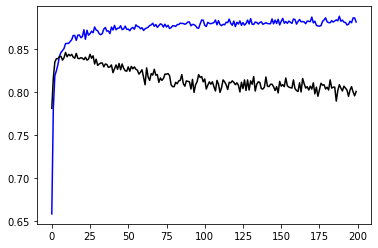

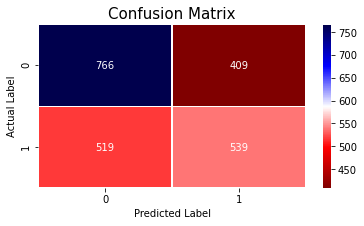

Time taken to apply the model to testing data and calculate performance metrics 20.602908469


In [2]:
#Code for models
model = keras.Sequential(
 [
 keras.layers.Dense(33, activation='relu', input_shape=(33,)),
 keras.layers.Dense(8, activation='relu'),
 keras.layers.Dropout(0.3),
 keras.layers.Dense(1, activation='sigmoid'),
 ]
)

model.compile(
 optimizer=keras.optimizers.Adam(1e-2), 
 loss='binary_crossentropy', 
 metrics=['accuracy']
)

history = model.fit(xtrain,ytrain,batch_size=512,epochs=200,verbose=2,validation_split = 0.2)

plt.plot(history.history['accuracy'], color = 'blue') 
plt.plot(history.history['val_accuracy'], color = 'black')

#Calculating Performance Metrics 
yp = model.predict(xtest)
y_pred = []
for element in yp:
    if element > 0.5:
        y_pred.append(1)
    else:
        y_pred.append(0)

print ("accuracy is %f" % accuracy_score(ytest,y_pred))
print('Precision Score: ', precision_score(ytest,y_pred))
print('Recall Score: ', recall_score(ytest,y_pred))
print('f1 Score:',f1_score(ytest, y_pred))
print('Matthews correlation coefficient', matthews_corrcoef(ytest, y_pred))
conf_matrix = confusion_matrix(ytest, y_pred)
f, ax = plt.subplots(figsize=(6, 3))
sns.heatmap(conf_matrix ,annot=True,cmap= "seismic_r", fmt="g", linewidths=.5, ax=ax)
plt.title("Confusion Matrix", fontsize=15)
ax.set_ylabel('Actual Label')
ax.set_xlabel('Predicted Label')
plt.show()
t_start= 0
t_end = time.perf_counter()
t_diff = t_end - t_start
print("Time taken to apply the model to testing data and calculate performance metrics" ,t_diff)


Epoch 1/200
14/14 - 0s - loss: 0.6924 - accuracy: 0.5677 - val_loss: 0.6374 - val_accuracy: 0.6982
Epoch 2/200
14/14 - 0s - loss: 0.5817 - accuracy: 0.6923 - val_loss: 0.4779 - val_accuracy: 0.7844
Epoch 3/200
14/14 - 0s - loss: 0.4902 - accuracy: 0.7773 - val_loss: 0.4134 - val_accuracy: 0.8191
Epoch 4/200
14/14 - 0s - loss: 0.4504 - accuracy: 0.8079 - val_loss: 0.4026 - val_accuracy: 0.8203
Epoch 5/200
14/14 - 0s - loss: 0.4286 - accuracy: 0.8181 - val_loss: 0.3896 - val_accuracy: 0.8242
Epoch 6/200
14/14 - 0s - loss: 0.4107 - accuracy: 0.8263 - val_loss: 0.3851 - val_accuracy: 0.8264
Epoch 7/200
14/14 - 0s - loss: 0.3986 - accuracy: 0.8358 - val_loss: 0.3776 - val_accuracy: 0.8354
Epoch 8/200
14/14 - 0s - loss: 0.3884 - accuracy: 0.8377 - val_loss: 0.3809 - val_accuracy: 0.8298
Epoch 9/200
14/14 - 0s - loss: 0.3868 - accuracy: 0.8426 - val_loss: 0.3778 - val_accuracy: 0.8326
Epoch 10/200
14/14 - 0s - loss: 0.3755 - accuracy: 0.8433 - val_loss: 0.3781 - val_accuracy: 0.8303
Epoch 11/

14/14 - 0s - loss: 0.2651 - accuracy: 0.8832 - val_loss: 0.5453 - val_accuracy: 0.8348
Epoch 84/200
14/14 - 0s - loss: 0.2657 - accuracy: 0.8844 - val_loss: 0.5336 - val_accuracy: 0.8382
Epoch 85/200
14/14 - 0s - loss: 0.2641 - accuracy: 0.8855 - val_loss: 0.5495 - val_accuracy: 0.8393
Epoch 86/200
14/14 - 0s - loss: 0.2668 - accuracy: 0.8845 - val_loss: 0.5213 - val_accuracy: 0.8303
Epoch 87/200
14/14 - 0s - loss: 0.2623 - accuracy: 0.8848 - val_loss: 0.5495 - val_accuracy: 0.8354
Epoch 88/200
14/14 - 0s - loss: 0.2569 - accuracy: 0.8905 - val_loss: 0.6215 - val_accuracy: 0.8387
Epoch 89/200
14/14 - 0s - loss: 0.2577 - accuracy: 0.8873 - val_loss: 0.5656 - val_accuracy: 0.8371
Epoch 90/200
14/14 - 0s - loss: 0.2620 - accuracy: 0.8858 - val_loss: 0.5723 - val_accuracy: 0.8410
Epoch 91/200
14/14 - 0s - loss: 0.2667 - accuracy: 0.8834 - val_loss: 0.6015 - val_accuracy: 0.8387
Epoch 92/200
14/14 - 0s - loss: 0.2667 - accuracy: 0.8842 - val_loss: 0.5005 - val_accuracy: 0.8410
Epoch 93/200


Epoch 165/200
14/14 - 0s - loss: 0.2401 - accuracy: 0.8971 - val_loss: 0.7016 - val_accuracy: 0.8410
Epoch 166/200
14/14 - 0s - loss: 0.2456 - accuracy: 0.8894 - val_loss: 0.7110 - val_accuracy: 0.8365
Epoch 167/200
14/14 - 0s - loss: 0.2425 - accuracy: 0.8956 - val_loss: 0.6962 - val_accuracy: 0.8359
Epoch 168/200
14/14 - 0s - loss: 0.2446 - accuracy: 0.8954 - val_loss: 0.6806 - val_accuracy: 0.8337
Epoch 169/200
14/14 - 0s - loss: 0.2424 - accuracy: 0.8937 - val_loss: 0.7301 - val_accuracy: 0.8331
Epoch 170/200
14/14 - 0s - loss: 0.2391 - accuracy: 0.8965 - val_loss: 0.7215 - val_accuracy: 0.8315
Epoch 171/200
14/14 - 0s - loss: 0.2443 - accuracy: 0.8907 - val_loss: 0.7508 - val_accuracy: 0.8343
Epoch 172/200
14/14 - 0s - loss: 0.2379 - accuracy: 0.8968 - val_loss: 0.7451 - val_accuracy: 0.8393
Epoch 173/200
14/14 - 0s - loss: 0.2401 - accuracy: 0.8943 - val_loss: 0.7731 - val_accuracy: 0.8382
Epoch 174/200
14/14 - 0s - loss: 0.2413 - accuracy: 0.8968 - val_loss: 0.7400 - val_accurac

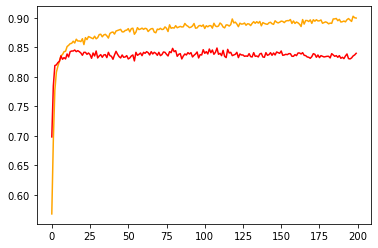

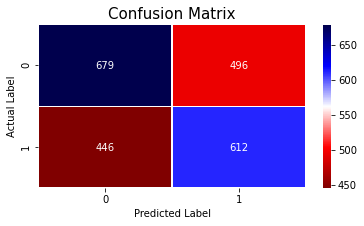

Time taken to apply the model to testing data and calculate performance metrics 37.665913845


In [3]:
model = keras.Sequential(
 [
 keras.layers.Dense(33, activation='relu', input_shape=(33,)),
 keras.layers.Dense(16, activation='relu'),
 keras.layers.Dropout(0.3),
 keras.layers.Dense(8, activation='relu'),
 keras.layers.Dropout(0.3),
 keras.layers.Dense(1, activation='sigmoid'),
 ]
)

model.compile(
 optimizer=keras.optimizers.Adam(1e-2), 
 loss='binary_crossentropy', 
 metrics=['accuracy']
)

history = model.fit(xtrain,ytrain,batch_size=512,epochs=200,verbose=2,validation_split = 0.2)
plt.plot(history.history['accuracy'], color = 'orange') 
plt.plot(history.history['val_accuracy'], color = 'red')

#Calculating Performance Metrics 
yp = model.predict(xtest)
y_pred = []
for element in yp:
    if element > 0.5:
        y_pred.append(1)
    else:
        y_pred.append(0)

print ("accuracy is %f" % accuracy_score(ytest,y_pred))
print('Precision Score: ', precision_score(ytest,y_pred))
print('Recall Score: ', recall_score(ytest,y_pred))
print('f1 Score:',f1_score(ytest, y_pred))
print('Matthews correlation coefficient', matthews_corrcoef(ytest, y_pred))
conf_matrix = confusion_matrix(ytest, y_pred)
f, ax = plt.subplots(figsize=(6, 3))
sns.heatmap(conf_matrix ,annot=True,cmap= "seismic_r", fmt="g", linewidths=.5, ax=ax)
plt.title("Confusion Matrix", fontsize=15)
ax.set_ylabel('Actual Label')
ax.set_xlabel('Predicted Label')
plt.show()
t_start= 0
t_end = time.perf_counter()
t_diff = t_end - t_start
print("Time taken to apply the model to testing data and calculate performance metrics" ,t_diff)

Epoch 1/200
14/14 - 0s - loss: 0.6452 - accuracy: 0.6165 - val_loss: 0.5086 - val_accuracy: 0.7727
Epoch 2/200
14/14 - 0s - loss: 0.5008 - accuracy: 0.7719 - val_loss: 0.4193 - val_accuracy: 0.8191
Epoch 3/200
14/14 - 0s - loss: 0.4448 - accuracy: 0.8106 - val_loss: 0.3933 - val_accuracy: 0.8197
Epoch 4/200
14/14 - 0s - loss: 0.4109 - accuracy: 0.8321 - val_loss: 0.3783 - val_accuracy: 0.8337
Epoch 5/200
14/14 - 0s - loss: 0.3954 - accuracy: 0.8422 - val_loss: 0.3763 - val_accuracy: 0.8343
Epoch 6/200
14/14 - 0s - loss: 0.3782 - accuracy: 0.8485 - val_loss: 0.3627 - val_accuracy: 0.8415
Epoch 7/200
14/14 - 0s - loss: 0.3792 - accuracy: 0.8522 - val_loss: 0.3732 - val_accuracy: 0.8359
Epoch 8/200
14/14 - 0s - loss: 0.3701 - accuracy: 0.8548 - val_loss: 0.3650 - val_accuracy: 0.8382
Epoch 9/200
14/14 - 0s - loss: 0.3610 - accuracy: 0.8596 - val_loss: 0.3704 - val_accuracy: 0.8337
Epoch 10/200
14/14 - 0s - loss: 0.3566 - accuracy: 0.8607 - val_loss: 0.3672 - val_accuracy: 0.8382
Epoch 11/

14/14 - 0s - loss: 0.2662 - accuracy: 0.8841 - val_loss: 0.4767 - val_accuracy: 0.8382
Epoch 84/200
14/14 - 0s - loss: 0.2720 - accuracy: 0.8872 - val_loss: 0.4454 - val_accuracy: 0.8410
Epoch 85/200
14/14 - 0s - loss: 0.2631 - accuracy: 0.8880 - val_loss: 0.4996 - val_accuracy: 0.8365
Epoch 86/200
14/14 - 0s - loss: 0.2565 - accuracy: 0.8886 - val_loss: 0.4953 - val_accuracy: 0.8253
Epoch 87/200
14/14 - 0s - loss: 0.2595 - accuracy: 0.8911 - val_loss: 0.4926 - val_accuracy: 0.8270
Epoch 88/200
14/14 - 0s - loss: 0.2584 - accuracy: 0.8915 - val_loss: 0.5022 - val_accuracy: 0.8270
Epoch 89/200
14/14 - 0s - loss: 0.2568 - accuracy: 0.8937 - val_loss: 0.4812 - val_accuracy: 0.8309
Epoch 90/200
14/14 - 0s - loss: 0.2649 - accuracy: 0.8838 - val_loss: 0.4670 - val_accuracy: 0.8292
Epoch 91/200
14/14 - 0s - loss: 0.2686 - accuracy: 0.8835 - val_loss: 0.4592 - val_accuracy: 0.8191
Epoch 92/200
14/14 - 0s - loss: 0.2649 - accuracy: 0.8842 - val_loss: 0.5450 - val_accuracy: 0.8247
Epoch 93/200


Epoch 165/200
14/14 - 0s - loss: 0.2270 - accuracy: 0.8950 - val_loss: 0.7520 - val_accuracy: 0.8298
Epoch 166/200
14/14 - 0s - loss: 0.2303 - accuracy: 0.8954 - val_loss: 0.7421 - val_accuracy: 0.8236
Epoch 167/200
14/14 - 0s - loss: 0.2298 - accuracy: 0.8937 - val_loss: 0.7059 - val_accuracy: 0.8259
Epoch 168/200
14/14 - 0s - loss: 0.2320 - accuracy: 0.8958 - val_loss: 0.7230 - val_accuracy: 0.8208
Epoch 169/200
14/14 - 0s - loss: 0.2282 - accuracy: 0.8984 - val_loss: 0.7405 - val_accuracy: 0.8247
Epoch 170/200
14/14 - 0s - loss: 0.2267 - accuracy: 0.8951 - val_loss: 0.7625 - val_accuracy: 0.8275
Epoch 171/200
14/14 - 0s - loss: 0.2265 - accuracy: 0.8982 - val_loss: 0.7838 - val_accuracy: 0.8259
Epoch 172/200
14/14 - 0s - loss: 0.2327 - accuracy: 0.8902 - val_loss: 0.7184 - val_accuracy: 0.8259
Epoch 173/200
14/14 - 0s - loss: 0.2254 - accuracy: 0.8981 - val_loss: 0.7946 - val_accuracy: 0.8191
Epoch 174/200
14/14 - 0s - loss: 0.2241 - accuracy: 0.8972 - val_loss: 0.6766 - val_accurac

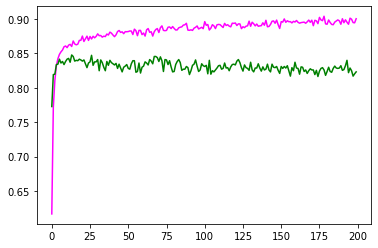

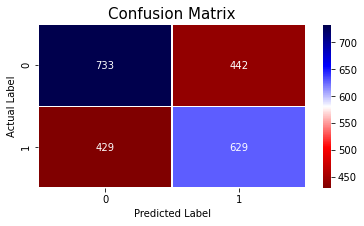

Time taken to apply the model to testing data and calculate performance metrics 59.00617474


In [4]:

model = keras.Sequential(
 [
keras.layers.Dense(33, activation='relu', input_shape=(33,)),
 keras.layers.Dense(25, activation='relu'),
 keras.layers.Dropout(0.3),
 keras.layers.Dense(20, activation='relu'),
 keras.layers.Dropout(0.3),
 keras.layers.Dense(15, activation='relu'),
 keras.layers.Dropout(0.3),
 keras.layers.Dense(1, activation='sigmoid'),
 ]
)

model.compile(
 optimizer=keras.optimizers.Adam(1e-2), 
 loss='binary_crossentropy', 
 metrics=['accuracy']
)

history = model.fit(xtrain,ytrain,batch_size=512,epochs=200,verbose=2,validation_split = 0.2)

plt.plot(history.history['accuracy'], color = 'magenta') 
plt.plot(history.history['val_accuracy'], color = 'green')

#Calculating Performance Metrics 
yp = model.predict(xtest)
y_pred = []
for element in yp:
    if element > 0.5:
        y_pred.append(1)
    else:
        y_pred.append(0)

print ("accuracy is %f" % accuracy_score(ytest,y_pred))
print('Precision Score: ', precision_score(ytest,y_pred))
print('Recall Score: ', recall_score(ytest,y_pred))
print('f1 Score:',f1_score(ytest, y_pred))
print('Matthews correlation coefficient', matthews_corrcoef(ytest, y_pred))
conf_matrix = confusion_matrix(ytest, y_pred)
f, ax = plt.subplots(figsize=(6, 3))
sns.heatmap(conf_matrix ,annot=True,cmap= "seismic_r", fmt="g", linewidths=.5, ax=ax)
plt.title("Confusion Matrix", fontsize=15)
ax.set_ylabel('Actual Label')
ax.set_xlabel('Predicted Label')
plt.show()
t_start= 0
t_end = time.perf_counter()
t_diff = t_end - t_start
print("Time taken to apply the model to testing data and calculate performance metrics" ,t_diff)
